# Data pre-processing

### Import Required Packages

In [ ]:
# pip install opencv-python
# pip install matplotlib
# pip install tensorflow
# pip install Keras-Preprocessing

In [17]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing.image import load_img, img_to_array
import warnings
warnings.filterwarnings("ignore")
# https://thinkinfi.com/real-time-emotion-recognition-using-facial-expressions-with-deep-learning-cnn/

###  Image count for each class

In [223]:
# Define name of each classes (all image folder names)
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad', 'surprise']
#  Creating class dictionary
class_dictionary = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}
#emojis unicodes #
emojis = {
    0: "\U0001f620",
    1: "\U0001F922",
    2: "\U0001f628",
    3: "\U0001f60A",
    4: "\U0001f610",
    5: "\U0001f625",
    6: "\U0001f632"
}
print(emojis.values(), sep=" ")
# Print number of images for each class
folder_path = "../dataset/"
for cls in classes:
    path = os.path.join(folder_path, 'train', cls)
    lst = os.listdir(path)
    number_files = len(lst)
    print(cls, ': ', number_files)

dict_values(['😠', '🤢', '😨', '😊', '😐', '😥', '😲'])
angry :  3995
disgust :  436
fear :  4097
happy :  7215
neutral :  4965
sad :  4830
surprise :  3171


Now if you want to train a model like MobileNet, which has lots of weights and parameters, you need to have a huge amount of RAM in your machine.</br>There is only one way to solve this memory issue, you need to make a small subset of your entire training dataset. And use that subset to train the model.

###  Create a folder structure using Python
Let’s first create a folder (subset folder) where we will copy some parts of the training images from our original training image folder.

In [7]:
# Create a empty folder
new_folder_path = "../new_dataset/"
os.makedirs(new_folder_path)
# Create "train" folder inside new_data folder
os.makedirs(new_folder_path+'train')
# Crate sub-folders
for cls in classes:
    os.makedirs(new_folder_path+'train/'+cls)

###  Copy images to Subfolder
Now you need to copy some images to the subfolder (new_data) from downloaded training image folder.

To do that I will copy 436 random images (which is the count of disgust images) of each emotion images to the subfolder. The below code is to do that.

In [8]:
# Copy 436 files to new folder
import shutil
import random
num_files = 436
for cls in classes:
    # Downloaded original training image folder path for face emotion recognition
    src_path = os.path.join(new_folder_path, 'train', cls)
    # Sub folder path
    dst_path = os.path.join(new_folder_path, 'train', cls)
    src_files = os.listdir(src_path)
    # Select random 436 images from source directory
    src_select_files = random.sample(src_files, num_files)
 
    # Copy selected images to destination folder
    for file_name in src_select_files:
        full_file_name = os.path.join(src_path, file_name)
        if os.path.isfile(full_file_name):
            shutil.copy(full_file_name, dst_path)

This code will copy <b>random 436 images</b> from the original to subfolder paths.

In [9]:
# Print number of images for each class
for cls in classes:
    path = os.path.join(new_folder_path, 'train', cls)
    lst = os.listdir(path)
    number_files = len(lst)
    print(cls, ': ', number_files)

angry :  436
disgust :  436
fear :  436
happy :  436
neutral :  436
sad :  436
surprise :  436


###  Show images using OpenCV

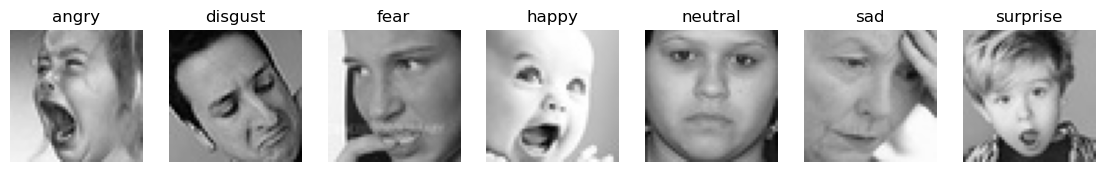

In [12]:
# Plot image of each class
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(new_folder_path+'train'):
    img = load_img((new_folder_path+'train'  +'/'+ expression +'/'+ os.listdir(new_folder_path+'train' +'/'+ expression)[0]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

###  Change Image size
As you already know that in this post I am going to use <b>MobileNet pre-trained deep learning architecture.</b>

Now MobileNet is trained on top of <b>ImageNet dataset</b>. The image size of this ImageNet dataset is <b>224×224.</b>

In [13]:
# Function to Read all the images: resize and convert in them to array using opencv
 
img_size = 224 ## ImageNet => 224x224
training_data = []
 
def create_training_data():
    for category in classes:
        path = os.path.join(new_folder_path, 'train', category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [18]:
temp_array = np.array(training_data)
temp_array.shape

(3052, 2)

In [20]:
# Reading one image from angry folder
img_array = cv2.imread(new_folder_path+'train/angry/Training_10290703.jpg')
print('Input image shape: ', img_array.shape)
 
# Convert image to 224x224
img_size = 224 ## ImageNet => 224x224
new_array = cv2.resize(img_array, (img_size, img_size))
print('Converted image shape: ', new_array.shape)

Input image shape:  (48, 48, 3)
Converted image shape:  (224, 224, 3)


###  Add image dimensions
You can see the shape of the converted image shape is => (224, 224, 3), which is <b>3-dimensional</b>. But the shape of ImageNet images is <b>4-dimensional.</b> So we need to convert the shape of our input images to match the ImageNet format. The below code is to do that.

In [21]:
X = []
y = []
 
for features, label in training_data:
    X.append(features)
    y.append(label)
     
X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimention
 
print(X.shape)
 
# Convert to array
Y = np.array(y)

(3052, 224, 224, 3)


- Storing features in the X variable
- Storing class labels in the y variable
- Adding one extra dimension at line 8

# Setup MobileNet model

<b>tensorflow.keras.applications</b> contains a large collection of models, we can use any model to predict the image. I am going to use the <b>MobileNet_v2</b> model which is one of the best face recognition algorithms.Mobilenet_v2 is the second version model of the Mobilenet series. This model use CNN (Convolutional neural networks) to predict image classes.

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 
# Download Pre-trained MobileNet Model
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model
 
# Print MobileNet architecture
model.summary()

14536120/14536120 [==============================] - 14s 1us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (

In the model architecture, if you see the <b>last layer</b> (fully connected Dense layer for predictions) has <b>1000 classes</b>. But for our case, <b>we have only 7 classes</b> (angry, disgust, fear, happy, neutral, sad, and surprise). So we need to change the last layer of the downloaded MobileNet pre-trained model. <b>This technique is called Transfer Learning.</b>

<b>Note:</b> We will not change the input layer as we already converted our image data to match the <b>image net format</b> (224×224).

In [23]:
# Defining first layer as input layer of Mobilenet
base_input = model.layers[0].input
print(base_input)
 
# Removing last layer of MobileNet model
base_output = model.layers[-2].output
 
# Adding some extra layers
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
# Defining final layer with 7 classes
final_output = layers.Dense(7, activation = 'softmax')(final_output) ## 7 because my classes are 7


KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [24]:
custom_model = keras.Model(inputs = base_input, outputs = final_output) ## Final model architecture
# Print our custom model summary
custom_model.summary()
 
# Compiling the model to train
custom_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

# Train model
So finally we are done with our data preparation and model configuration. Now let’s train our custom model to detect facial expressions. To do that just run the below code.

I am going to use batch size = 8 and 25 epochs to avoid any memory error while training in the local windows system.

In [25]:
custom_model.fit(X, Y, epochs = 25, batch_size = 8)

Epoch 1/25
382/382 [==============================] - 174s 430ms/step - loss: 1.8608 - accuracy: 0.2382
Epoch 2/25
382/382 [==============================] - 142s 372ms/step - loss: 1.7799 - accuracy: 0.2939
Epoch 3/25
382/382 [==============================] - 153s 401ms/step - loss: 1.6743 - accuracy: 0.3414
Epoch 4/25
382/382 [==============================] - 135s 352ms/step - loss: 1.5607 - accuracy: 0.4001
Epoch 5/25
382/382 [==============================] - 153s 401ms/step - loss: 1.5048 - accuracy: 0.4204
Epoch 6/25
382/382 [==============================] - 159s 417ms/step - loss: 1.4527 - accuracy: 0.4391
Epoch 7/25
382/382 [==============================] - 165s 432ms/step - loss: 1.4079 - accuracy: 0.4512
Epoch 8/25
382/382 [==============================] - 163s 426ms/step - loss: 1.3382 - accuracy: 0.4843
Epoch 9/25
382/382 [==============================] - 187s 491ms/step - loss: 1.2699 - accuracy: 0.5111
Epoch 10/25
382/382 [==============================] - 167s 437m

As you can see the model started with 24 accuracy. It is because we are using the pre-trained model. It already knows some basic feature information about any images. This is the beauty of Transfer learning. <b>The final accuracy of our custom emotion detection model is 76%.</b>

###  Save trained model

In [89]:
custom_model.save('human_emotion_model.h5')

# Facial Emotion Recognition for Images

###  Read image
Let’s first read the image using OpenCV. This sample image I have downloaded from the internet to test the model.

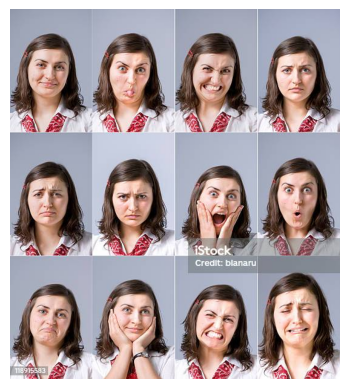

In [310]:
# Read downloaded test image in Opencv
test_img = cv2.imread('../dataset/images/istockphoto-118915583-612x612.jpg')
# Take a backup of input image before face detection
img_bcp = test_img.copy()
# disable axis
plt.axis('off')
# Show image in OpenCV
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB));

###  Face detection and cropping
To detect facial expressions we first need to detect the face. Then the detected face (cropped) we need to pass to our custom model to predict. In this tutorial, I am going to use HAAR cascading algorithm to detect the face. This is easy and lightweight.

12


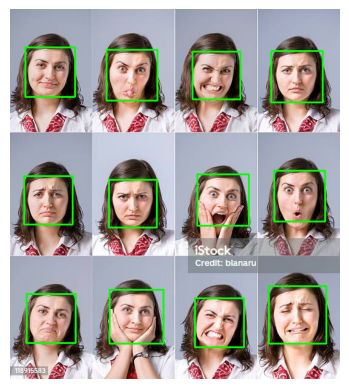

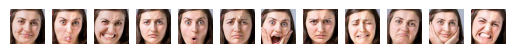

In [311]:
# Define haar cascade classifier for face detection
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Convert image to gray scale OpenCV
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
# Detect face using haar cascade classifier
faces_coordinates = face_classifier.detectMultiScale(gray_img,scaleFactor=1.3, minNeighbors=10)
cropped_faces = []
print(len(faces_coordinates))
# Draw a rectangle around the faces
for (x, y, w, h) in faces_coordinates:
    # Draw rectangle around face
    cv2.rectangle(test_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Crop face from image
    cropped_faces.append(img_bcp[y:y+h, x:x+w])

# Plot original image
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show();
for index, item in enumerate(cropped_faces):
    # Plot original image
    plt.subplot(1, len(cropped_faces), index+1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(item, cv2.COLOR_BGR2RGB))

###  Model Prediction
In this step, we will pass this cropped image to the model to predict the emotion of the face. But before passing this cropped image we need to:
- Change image shape: As our model only accepts ImageNet data format, so we need to convert its shape to 224×244 pixel
- Convert it to a 4-dimensional image: Since the downloaded image is a normal 3-dimensional image, we need to convert it to 4d (as we trained our model for 4-dimensional images only).

In [312]:

predictions = []
# Load model
new_model = tf.keras.models.load_model('human_emotion_model.h5')
for index, item in enumerate(cropped_faces):
    final_image = cv2.resize(item, (224,224))
    final_image = np.expand_dims(final_image, axis=0) ## Need 4th dimension
    pred = new_model.predict(final_image)
    predictions.append(pred)
    class_dictionary[np.argmax(pred)]


1/1 [==============================] - 0s 51ms/step


Now, this is the final output. As you can see our model truly predicts the feeling of the girl which is happiness. Now let’s overlay this predition on top of the input image.

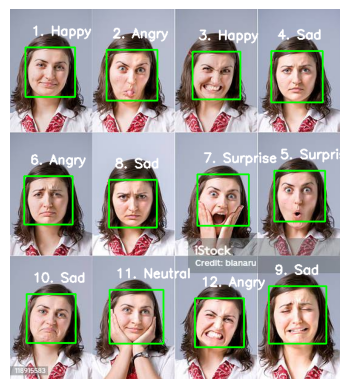

In [313]:
# Convert 4-d image to 3d
img_3d = np.squeeze(img_bcp)
 
# Define opencv font style
font = cv2.FONT_HERSHEY_SIMPLEX
 
# Draw a rectangle around the faces
for index,(x, y, w, h) in enumerate(faces_coordinates):
    # Draw rectangle around face
    cv2.rectangle(img_3d, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Write face emotion class text on image
    cv2.putText(img_3d, str(index+1)+'. '+class_dictionary[np.argmax(predictions[index])], (x+10, y-20),font, 0.7, (255, 255, 255), 2, cv2.LINE_4)
 
# Show output image
plt.axis('off')
plt.imshow(cv2.cvtColor(img_3d, cv2.COLOR_BGR2RGB));

In [305]:
import cv2
def _predict(path):
    my_model = tf.keras.models.load_model('human_emotion_model.h5')
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(path)
    img_bcp = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
    print("No of faces : ",len(faces))
    for i,(x, y, w, h) in enumerate(faces):
        num_person = i+1
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = img_bcp[y:y + h, x:x + w]                      #croping
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (224,224)), -1), 0)
        prediction = my_model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        print("person ",num_person," : ",class_dictionary[maxindex], "-->",emojis[maxindex])
        cv2.putText(image, str(num_person)+ ". "+class_dictionary[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  
                                              #if text is not apeared , change coordinates. it may work
    # Show output image
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

No of faces :  3
1/1 [==============================] - 0s 484ms/step
person  1  :  Happy --> 😊
1/1 [==============================] - 0s 40ms/step
person  2  :  Happy --> 😊
1/1 [==============================] - 0s 36ms/step
person  3  :  Happy --> 😊


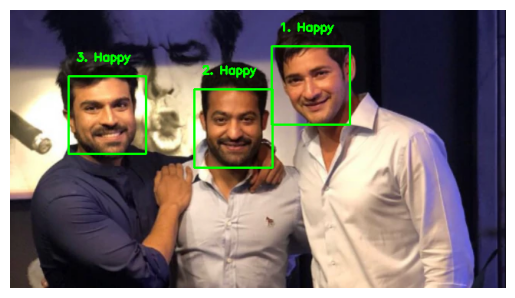

In [309]:
_predict('../dataset/images/Ram_Charan.webp')

# Real-time Facial Emotion Recognition for Video
Now let’s implement this code for a video to see how our model is performing real time to recognize facial emotion.

In [88]:
import tensorflow as tf
import cv2
 
import os
import matplotlib.pyplot as plt
import numpy as np
 
from keras_preprocessing.image import load_img, img_to_array
 
# Play video in python
import cv2
 
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
 
# Below function will read video imgs
cap = cv2.VideoCapture( 'Free people expression footage  mad shocked surprised wow amazed face   _ NO COPYRIGHT VIDEOS.mp4')
 
# Load trained model
cap_model = tf.keras.models.load_model('human_emotion_model.h5')
while True:
    read_ok, img = cap.read()
    img_bcp = img.copy()
    cv2.imshow("Play video in python", img)
 
    # Define haar cascade classifier for face detection
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
 
    # Convert image to gray scale OpenCV
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # Detect face using haar cascade classifier
    faces_coordinates = face_classifier.detectMultiScale(gray_img)
 
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces_coordinates:
        # Draw rectangle around face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
        # Crop face from image
        cropped_face = img_bcp[y:y + h, x:x + w]
 
    final_image = cv2.resize(cropped_face, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    # final_image = final_image / 255.0
 
    predictions = cap_model.predict(final_image)
 
    cv2.putText(img, class_dictionary[np.argmax(predictions)], (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
 
    cv2.imshow('Face Emotion Recognition', img)
 
    # Close video window by pressing 'x'
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

AttributeError: 'NoneType' object has no attribute 'copy'